In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [128]:
data=pd.read_csv("/content/drive/MyDrive/IBM/data/Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


## Analysis
## Univariate

<Axes: xlabel='hotwaterheating', ylabel='count'>

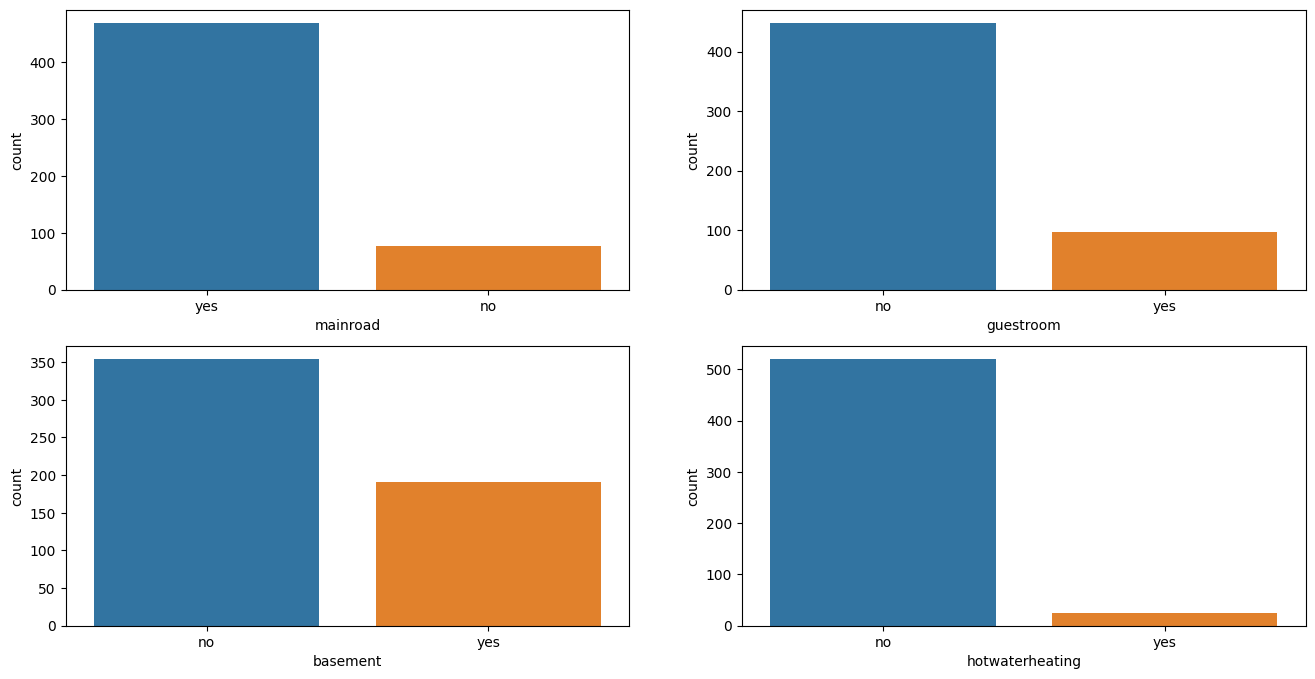

In [130]:
fig,axes=plt.subplots(2,2,figsize=(16,8))
sns.countplot(x="mainroad",data=data,ax=axes[0,0])
sns.countplot(x="guestroom",data=data,ax=axes[0,1])
sns.countplot(x="basement",data=data,ax=axes[1,0])
sns.countplot(x="hotwaterheating",data=data,ax=axes[1,1])

## Bivariate

<Axes: xlabel='stories', ylabel='Count'>

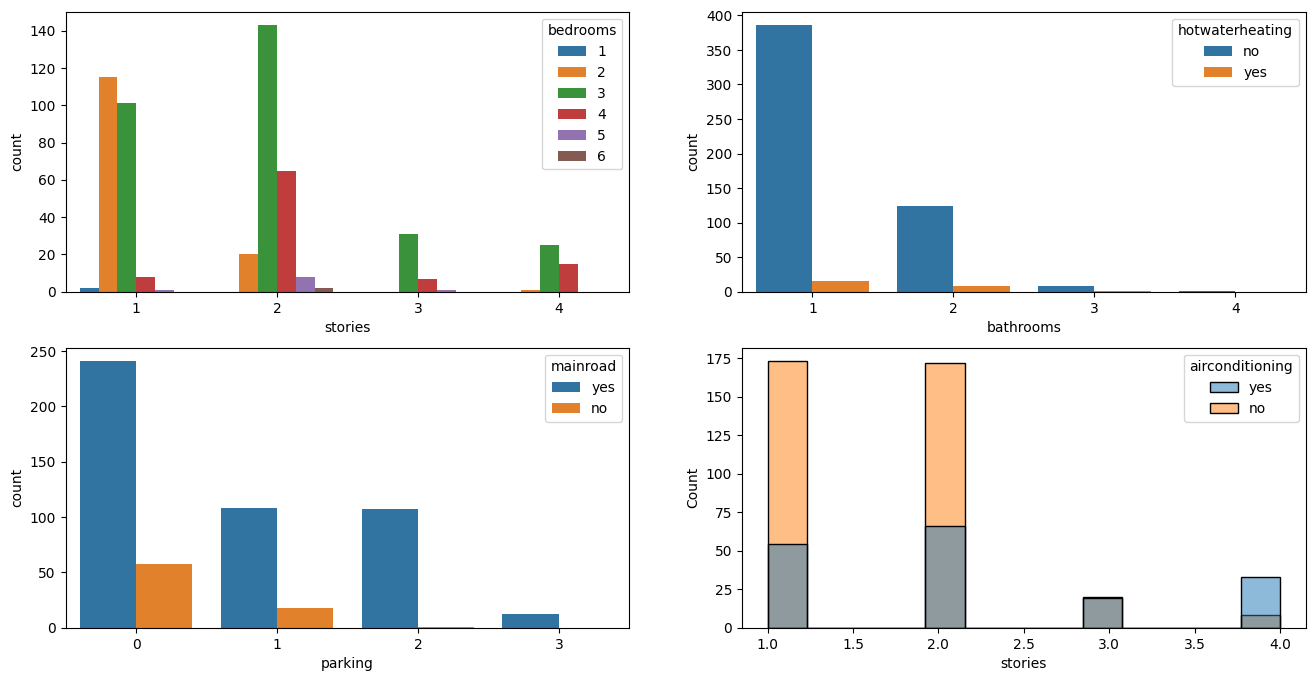

In [131]:
fig,axes=plt.subplots(2,2,figsize=(16,8))
sns.countplot(x="stories",data=data,hue="bedrooms",ax=axes[0,0])
sns.countplot(x="bathrooms",data=data,hue="hotwaterheating",ax=axes[0,1])
sns.countplot(x="parking",data=data,hue="mainroad",ax=axes[1,0])
sns.histplot(x="stories",data=data,hue="airconditioning",ax=axes[1,1])

<Axes: xlabel='price', ylabel='area'>

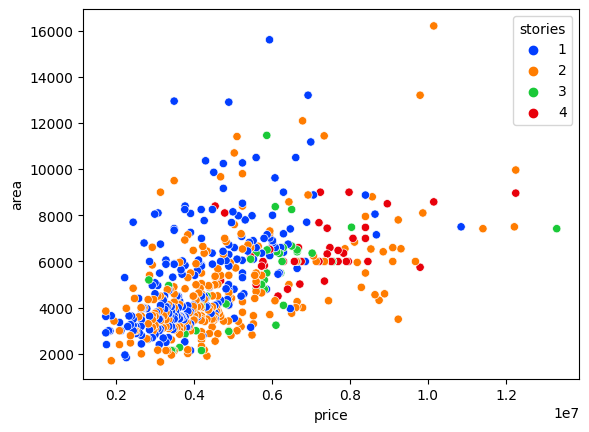

In [132]:
sns.scatterplot(x="price",y="area",data=data,hue="stories",palette="bright")

## multivariate

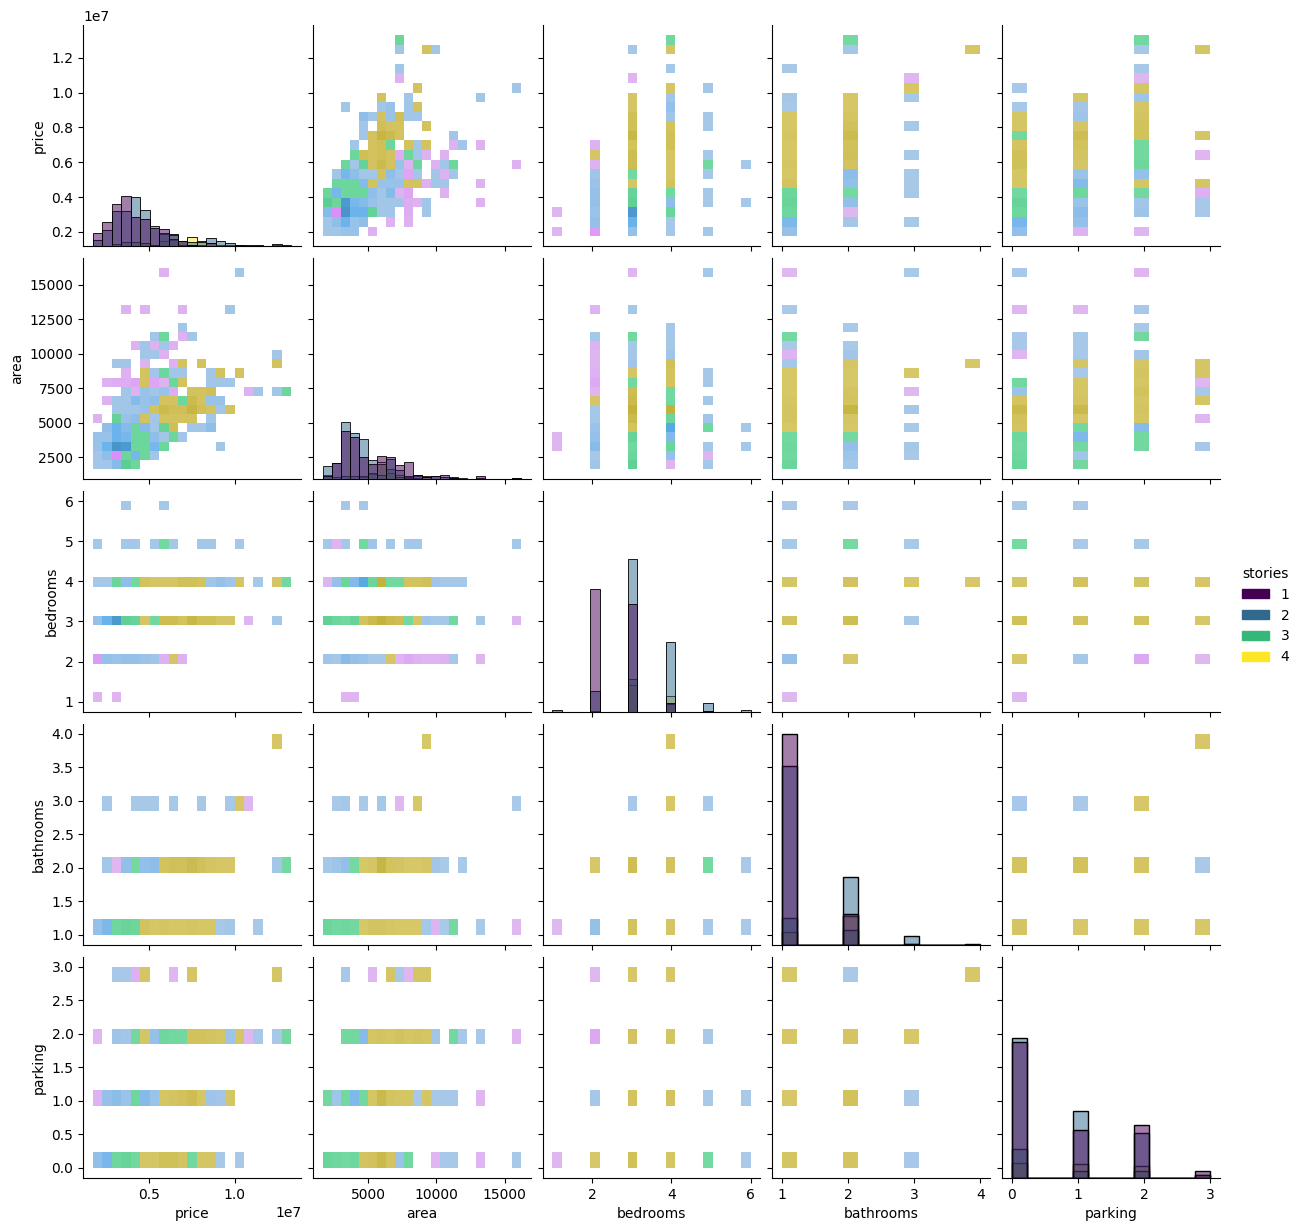

In [133]:
sns.pairplot(data,hue="stories",palette="viridis",kind="hist")

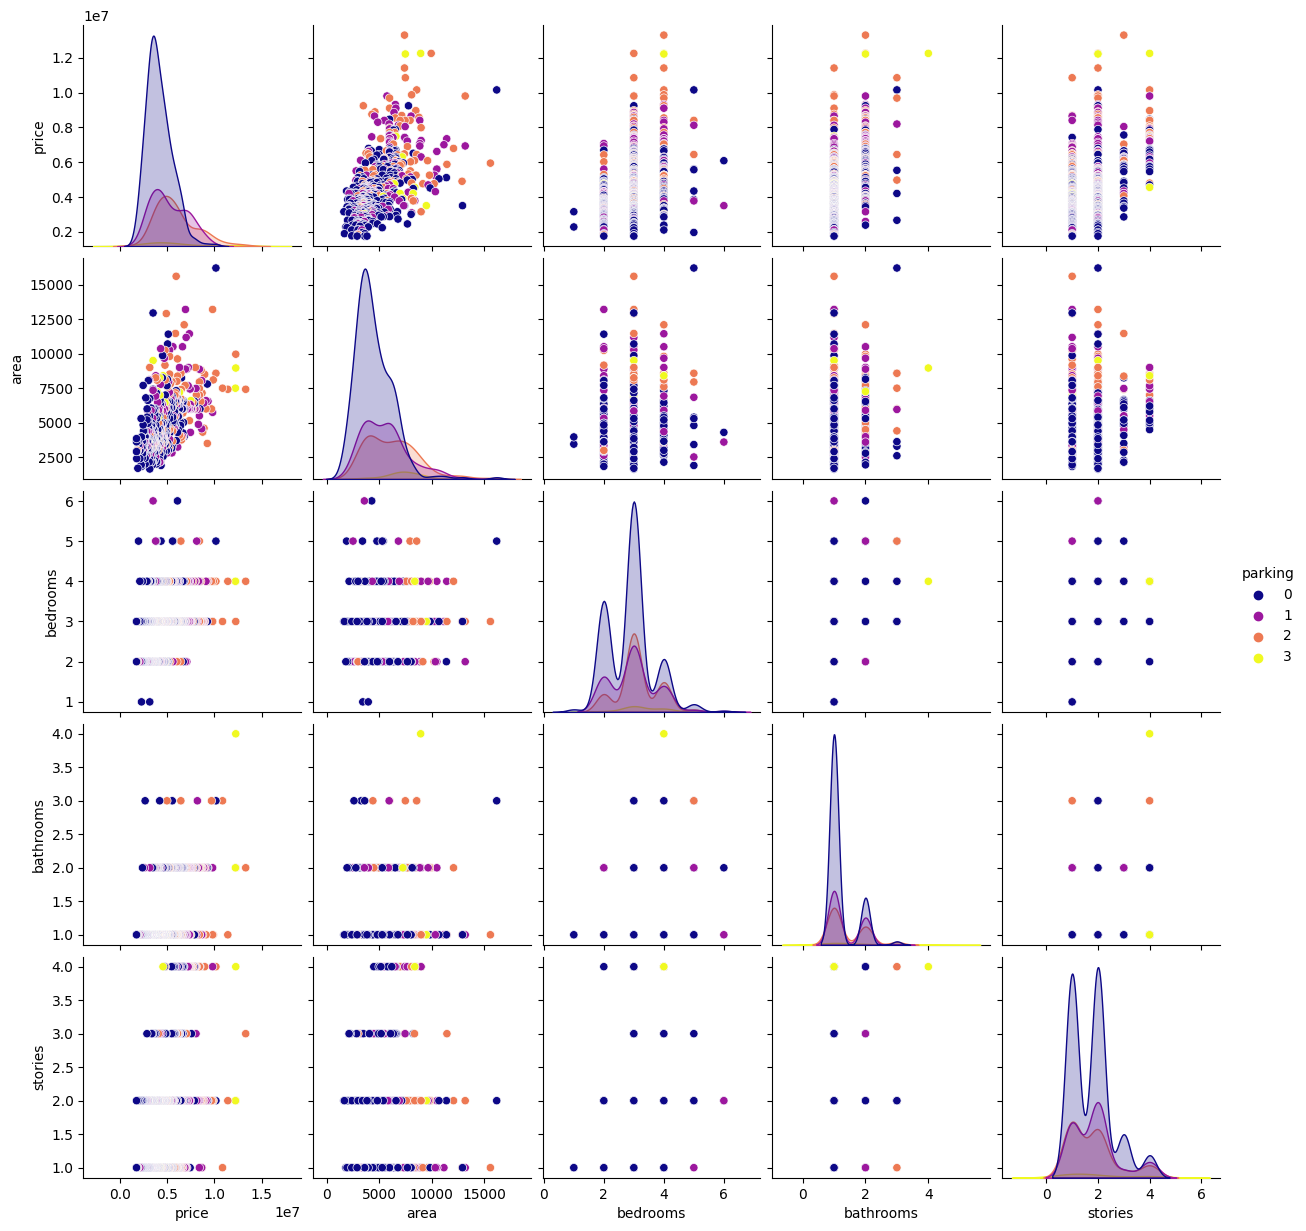

In [134]:
sns.pairplot(data,hue="parking",palette="plasma")

## Descriptive Stats

In [135]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


<Axes: >

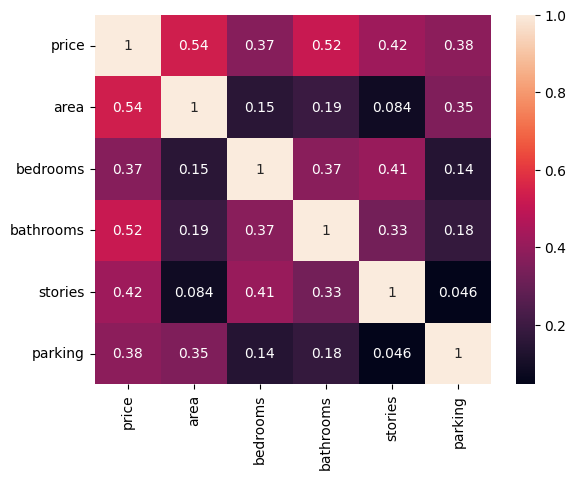

In [136]:
x=data.iloc[:,[0,1,2,3,4,10]]
sns.heatmap(x.corr(),annot=True)

## missing values

In [137]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [138]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'furnishingstatus'],
      dtype='object')

## Outliers

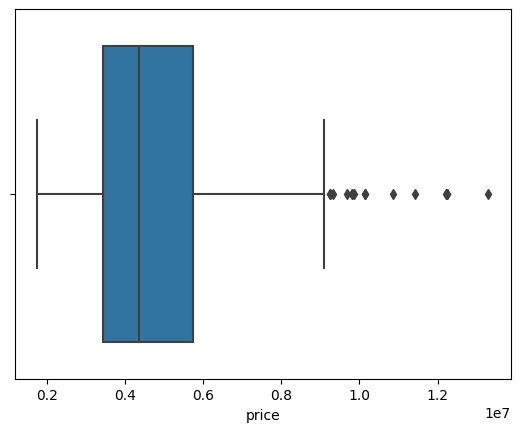

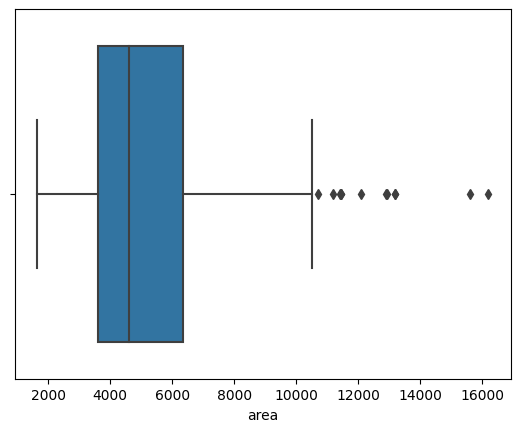

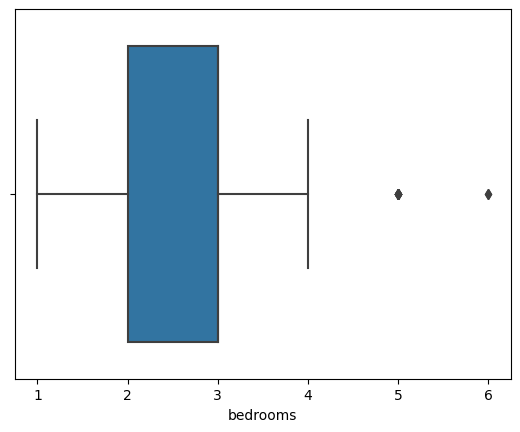

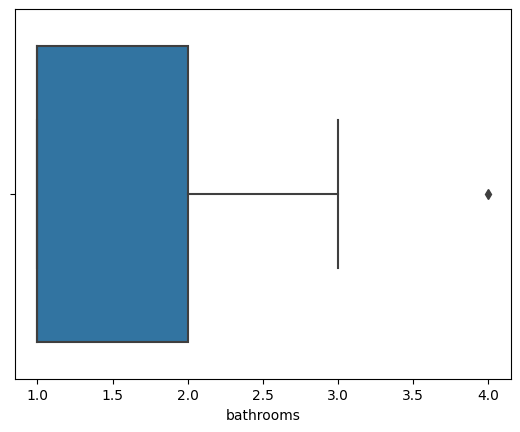

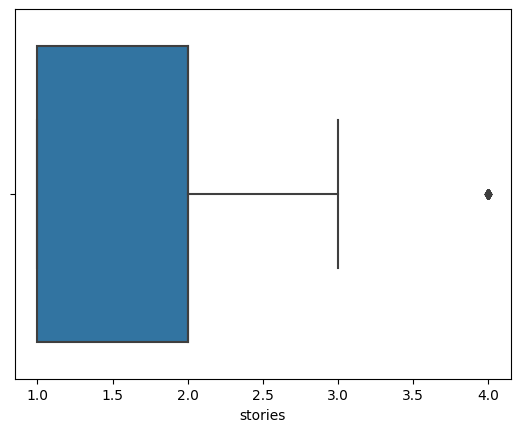

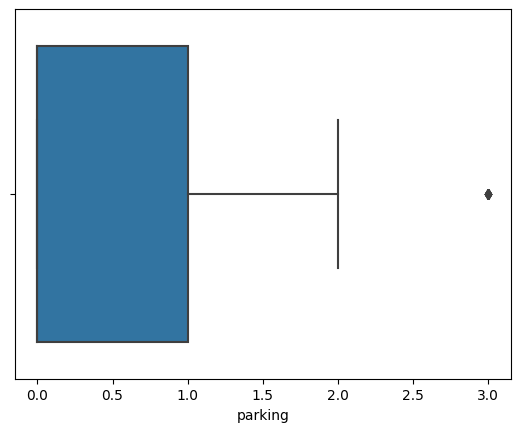

In [139]:
list=['price','area','bedrooms','bathrooms','stories','parking']
for i in range(len(list)):
  plt.figure()
  sns.boxplot(x=list[i],data=data)

In [140]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
data['mainroad']=label.fit_transform(data['mainroad'])
data["guestroom"]=label.fit_transform(data["guestroom"])
data["basement"]=label.fit_transform(data["basement"])
data["hotwaterheating"]=label.fit_transform(data["hotwaterheating"])
data["airconditioning"]=label.fit_transform(data["airconditioning"])
data["furnishingstatus"]=label.fit_transform(data["furnishingstatus"])


In [141]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  furnishingstatus  545 non-null    int64
dtypes: int64(12)
memory usage: 51.2 KB


In [143]:
y=data["price"]
x=data.drop("price",axis=1)

In [144]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,max_error

In [145]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [146]:
reg=LinearRegression()
reg.fit(X_train,y_train)
p=reg.predict(X_test)

In [147]:
r2_score(y_test,p)

0.7276315653869775

In [148]:
# pipe=Pipeline([("scaler",MinMaxScaler()),("regressor",LinearRegression())])
pipe=Pipeline([("scaler",StandardScaler()),("regressor",LinearRegression())])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)
p=pipe.predict(X_test)
print("r2 : ",r2_score(y_test,p))

r2 :  0.7276315653869788


In [149]:
print("MSE error : ",mean_squared_error(y_test,p))
print("MAE error : ",mean_absolute_error(y_test,p))
print("RMSE : ",np.sqrt(mean_squared_error(y_test,p)))
print("r2 : ",r2_score(y_test,p))
print("max error : ",max_error(y_test,p))
print("RMSLE : ",np.log(np.sqrt(mean_squared_error(y_test,p))))


MSE error :  794135342254.1277
MAE error :  736188.939146758
RMSE :  891142.7171077188
r2 :  0.7276315653869788
max error :  2672922.9650423713
RMSLE :  13.700259869953495
